## READING DATASET

In [26]:
import pandas as pd
import numpy as np

In [27]:
data = pd.read_csv('datasets/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### DROPPING unnecessary COLUMNS

In [28]:
col = ['race', 'sex', 'education.num','marital.status','relationship']
data.drop(columns=col,inplace=True)
data.head()

,age,workclass,fnlwgt,education,occupation,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,?,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,Exec-managerial,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,?,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,Machine-op-inspct,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,Prof-specialty,0,3900,40,United-States,<=50K


### Handling MISSING VALUES BY ENCODING THEM

```
After one hot encoding if all the values are false that means it was a missing value
and the model will handle it as a separate category
```

In [29]:
y = data['income']
X = data.drop(columns=['income'])


x_encoded = pd.get_dummies(X, drop_first=True)
x_encoded.head()


,age,fnlwgt,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,0,4356,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,82,132870,0,4356,18,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,66,186061,0,4356,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,0,3900,40,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,0,3900,40,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


### SPLITTING DATASET

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=42)
x_test,x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("x_val shape:", x_val.shape)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

x_train shape: (22792, 83)
x_test shape: (4884, 83)
x_val shape: (4885, 83)
y_train shape: (22792,)
y_test shape: (4884,)
y_val shape: (4885,)


###  Analyzing class distributions and feature-target relationships

In [32]:
# Still working on the analysis of class distributions and feature-target relationships
# Asked the TA for clarification on this part
# Waiting for his response before proceeding further

## BUILDING THE MODEL

In [33]:
class naive_bayes:
    def __init__(self,alpha=1.0):
        self.alpha=alpha
        self.class_priors={}
        self.likelihoods={}
        self.classes=None
        
    def fit(self,x,y):
        class_count = y.value_counts().to_dict()
        self.classes = y.unique()
        
        
        for c in self.classes:
            num_samples_in_class = class_count.get(c, 0)
            # Calculating class priors  RULE : P(C) = (count(C) + alpha) / (total_samples + alpha * num_classes)
            self.class_priors[c] = (num_samples_in_class + self.alpha) / (len(y) + self.alpha * len(self.classes))
            
            # Calculating likelihoods  RULE : P(F|C) = (count(F,C) + alpha) / (count(C) + alpha * num_feature_values)
            x_c = x[y == c]
            feature_likelihoods = {}
            
            for feature in x.columns:
                # getting counts of feature values given class c
                feature_counts = x_c[feature].value_counts().to_dict()
                # getting number of unique values for the feature
                num_feature_values = x[feature].nunique()
                likelihoods = {}
                
                for feature_value in x[feature].unique():
                    likelihoods[feature_value] = (feature_counts.get(feature_value, 0) + self.alpha) / (num_samples_in_class + self.alpha * num_feature_values)
                feature_likelihoods[feature] = likelihoods
                
            self.likelihoods[c] = feature_likelihoods
            
            
            
            
    def predict(self,x):
        predictions = []
        
        for _, row in x.iterrows():
            class_probs = {}
            
            for c in self.classes:
                # Start with the class prior
                class_prob = self.class_priors[c]
                
                # Multiply by the likelihoods of each feature given the class
                for feature in x.columns:
                    feature_value = row[feature]
                    # adding a default value if the feature is never seen before by using laplace smoothing where count = 0
                    likelihood = self.likelihoods[c][feature].get(feature_value, 1 / len(self.likelihoods[c][feature]) )
                    # using log probabilities to avoid underflow
                    class_prob += np.log(likelihood)
                    
                class_probs[c] = class_prob
                
            # Choose the class with the highest probability
            predictions.append(max(class_probs, key=class_probs.get))
            
        return predictions

## Testing and Evaluating the Model

##### Testing different models with variable alpha values

In [34]:
alphas = [0.1, 0.5, 1.0, 2.0, 5.0]
accurracies_alphas = []


for alpha in alphas:
    model = naive_bayes(alpha=alpha)
    model.fit(x_train, y_train)
    
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    val_predictions = model.predict(x_val)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    val_accuracy = accuracy_score(y_val, val_predictions)
    
    accurracies_alphas.append(test_accuracy)
    
    print(f"Alpha: {alpha}")
    
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}\n")
    
    print("Classification Report:\n", classification_report(y_test, test_predictions))
    print("Confusion Matrix:\n\n", confusion_matrix(y_test, test_predictions))


Alpha: 0.1
Train Accuracy: 0.9133
Test Accuracy: 0.7979
Validation Accuracy: 0.8086

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.90      0.83      0.86      3692
        >50K       0.57      0.71      0.63      1192

    accuracy                           0.80      4884
   macro avg       0.73      0.77      0.75      4884
weighted avg       0.82      0.80      0.80      4884

Confusion Matrix:

 [[3055  637]
 [ 350  842]]
Alpha: 0.5
Train Accuracy: 0.8734
Test Accuracy: 0.8051
Validation Accuracy: 0.8170

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.90      0.83      0.87      3692
        >50K       0.58      0.72      0.64      1192

    accuracy                           0.81      4884
   macro avg       0.74      0.78      0.76      4884
weighted avg       0.82      0.81      0.81      4884

Confusion Matrix:

 [[3070  622]
 [ 330  862]]
Alpha: 1.0
Train Accuracy: 0.8532


##### Testing the model with different subsets of data

In [35]:
subset1 = ['age', 'hours.per.week']
subset2 = ['capital.gain', 'capital.loss']
subset3 = ['age', 'hours.per.week', 'capital.gain']
model = naive_bayes(alpha=0.5)
for s in [subset1, subset2, subset3]:
    model.fit(x_train[s], y_train)
    preds = model.predict(x_test[s])
    print("Subset:", s)
    print("Accuracy:", accuracy_score(y_test, preds))


Subset: ['age', 'hours.per.week']
Accuracy: 0.7280917280917281
Subset: ['capital.gain', 'capital.loss']
Accuracy: 0.8341523341523341
Subset: ['age', 'hours.per.week', 'capital.gain']
Accuracy: 0.7848075348075348


## Comparing model performance with sklearn's Naive Bayes 

In [36]:
predicted_classes_built_in = []
accurracies_built_in = []

for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(x_train, y_train)
    
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    val_predictions = model.predict(x_val)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    val_accuracy = accuracy_score(y_val, val_predictions)
    
    predicted_classes_built_in.append(test_predictions)
    accurracies_built_in.append(test_accuracy)
    
    print(f"Alpha: {alpha}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}\n")
    
    print("Classification Report:\n", classification_report(y_test, test_predictions))
    print("Confusion Matrix:\n\n", confusion_matrix(y_test, test_predictions))


Alpha: 0.1
Train Accuracy: 0.7824
Test Accuracy: 0.7801
Validation Accuracy: 0.7857

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      3692
        >50K       0.63      0.24      0.35      1192

    accuracy                           0.78      4884
   macro avg       0.71      0.60      0.61      4884
weighted avg       0.75      0.78      0.74      4884

Confusion Matrix:

 [[3520  172]
 [ 902  290]]
Alpha: 0.5
Train Accuracy: 0.7824
Test Accuracy: 0.7801
Validation Accuracy: 0.7857

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      3692
        >50K       0.63      0.24      0.35      1192

    accuracy                           0.78      4884
   macro avg       0.71      0.60      0.61      4884
weighted avg       0.75      0.78      0.74      4884

Confusion Matrix:

 [[3520  172]
 [ 902  290]]
Alpha: 1.0
Train Accuracy: 0.7824


#### PLOTTING THE RESULTS 

In [37]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

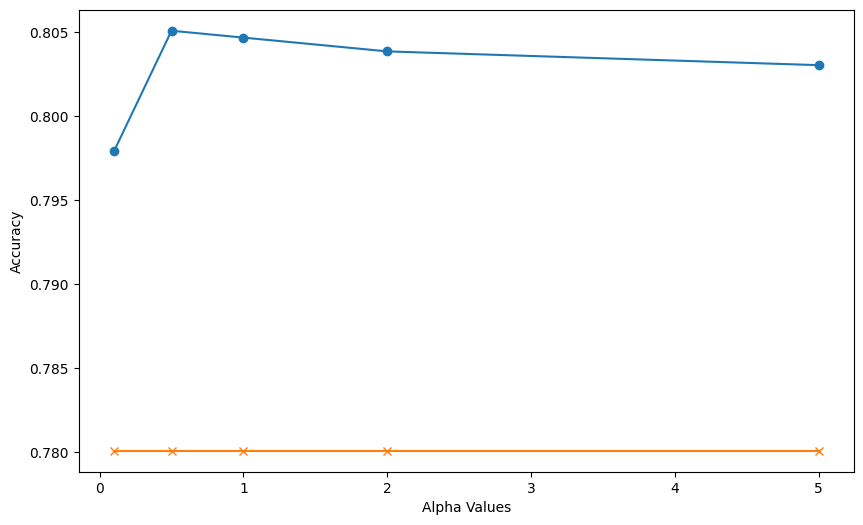

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, accurracies_alphas, marker='o', label='Custom Naive Bayes')
plt.plot(alphas, accurracies_built_in, marker='x', label='Built-in Naive Bayes')
plt.xlabel('Alpha Values')
plt.ylabel('Accuracy')